# Exploring various Machine Learning Algorithms for Product Sales Predictor model

As part of the current exercise, we are aiming to explore the various machine learning algorithms, such as Linear Regression for 
single parameter and multi-parameter inputs and Polynomial regression. We will try to establish the efficiency of each model by running training and test operations on the data from our mongo database.

## Step 1: Import Necessary Libraries

First we will import the necessary libraries required to perform the operations.

In [89]:
import pymongo
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

## Step 2: Load and Explore Your Data

Next we will try to import the python module that reads the data from our mongo database and display the number of datapoints.

In [90]:
import mongodemo
documents = mongodemo.documents
print(len(documents))

9500


We have now imported 9500 data points from the mongoDB. We will try to create a dataframe from the data we have imported and display first few rows of the data.

In [91]:
# Create pandas dataframe
salesData = pd.DataFrame(documents)
print(salesData.head())

                        _id    brand       model  number_of_colors  \
0  652ad67390648429e33c8121   Xiaomi     P40 Pro                 4   
1  652ad67390648429e33c8122    Apple     Pixel 4                 3   
2  652ad67390648429e33c8123   Google  Galaxy S20                 4   
3  652ad67390648429e33c8124  Samsung    iPhone X                 2   
4  652ad67390648429e33c8125   Xiaomi    iPhone X                 2   

   screen_size resolution         processor  ram_in_GBs  storage_in_GBs  \
0          4.3       720p        Exynos 990           2              16   
1          5.0       720p    Snapdragon 865           2              32   
2          4.4      1080p    Snapdragon 865           4              16   
3          4.1       720p         Kirin 990           4              16   
4          4.9      1080p  Apple A14 Bionic           4              16   

   battery_capacity  ...  sim_card_type  expandable_storage      display_type  \
0              5944  ...       Nano SIM        

Now we need to clean the data before we can create our models. We will eliminate the text data, null data or missing data from the dataframe and retain only the numeric data.

In [92]:
#Eliminate all the columns of the type other than numbers
salesData = salesData.select_dtypes(include=['int64','float64'])

#Eliminate missing values
print('salesData contains %d missing values' %(salesData.isnull().sum().sum()))
salesData.dropna(inplace=True)

#Check presence of missing
print('After the missing elimination, there are %d missing in the data' %(salesData.isnull().sum().sum()))
print(salesData.head())

salesData contains 0 missing values
After the missing elimination, there are 0 missing in the data
   number_of_colors  screen_size  ram_in_GBs  storage_in_GBs  \
0                 4          4.3           2              16   
1                 3          5.0           2              32   
2                 4          4.4           4              16   
3                 2          4.1           4              16   
4                 2          4.9           4              16   

   battery_capacity  camera_resolution  front_camera_resolution  \
0              5944                 12                       10   
1              5279                 12                       16   
2              5592                 20                       10   
3              5036                 20                       16   
4              5925                 20                       10   

   operating_system_version  release_date  weight   price  customer_rating  \
0                       8.8        

Extract the features ('price', 'percent_negative_reviews', 'customer_rating') and target variable ('total_sales') from the dataframe

In [93]:
#Select the X and Y
Y = salesData['total_sales']
X = salesData[['price', 'percent_negative_reviews', 'customer_rating']]
print(X)
print(Y)

       price  percent_negative_reviews  customer_rating
0     219.86                        30              3.9
1     264.95                        31              3.1
2     261.78                        30              3.3
3     244.49                        30              3.2
4     267.88                        30              3.9
...      ...                       ...              ...
9495  736.83                        10              4.8
9496  700.18                        10              4.1
9497  701.24                        10              4.1
9498  738.96                        12              4.2
9499  735.62                        12              4.8

[9500 rows x 3 columns]
0       277406
1       312061
2       340125
3       327129
4       250484
         ...  
9495    704520
9496    617529
9497    629856
9498    669895
9499    626387
Name: total_sales, Length: 9500, dtype: int64


## Step 3: Plot the data

We will try to plot the various feature variables against the target variables

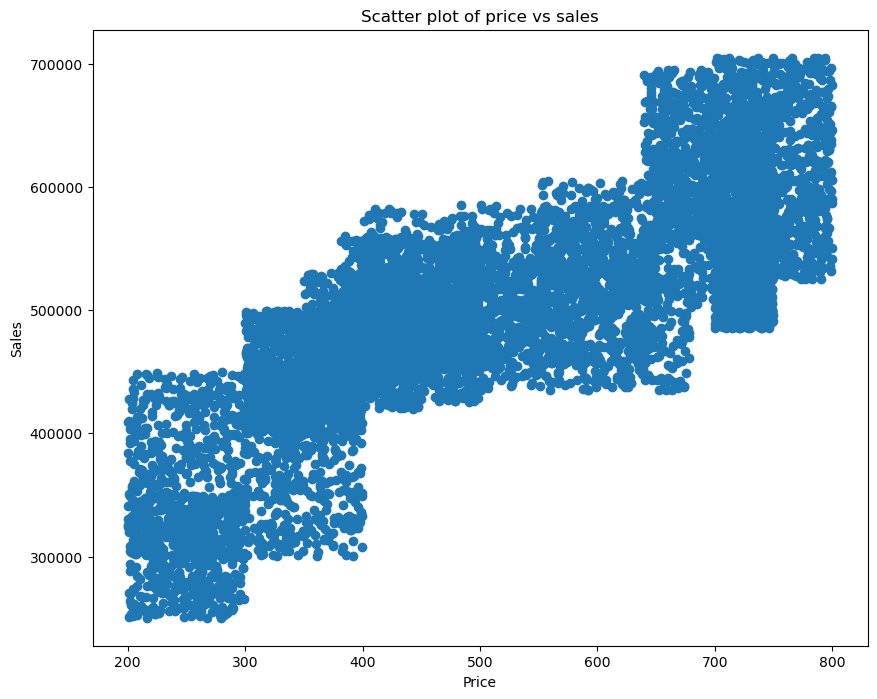

In [94]:
#Plot the data
X1 = X['price']
plt.figure(figsize=(10,8))
plt.scatter(X1, Y)
plt.title('Scatter plot of price vs sales')
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

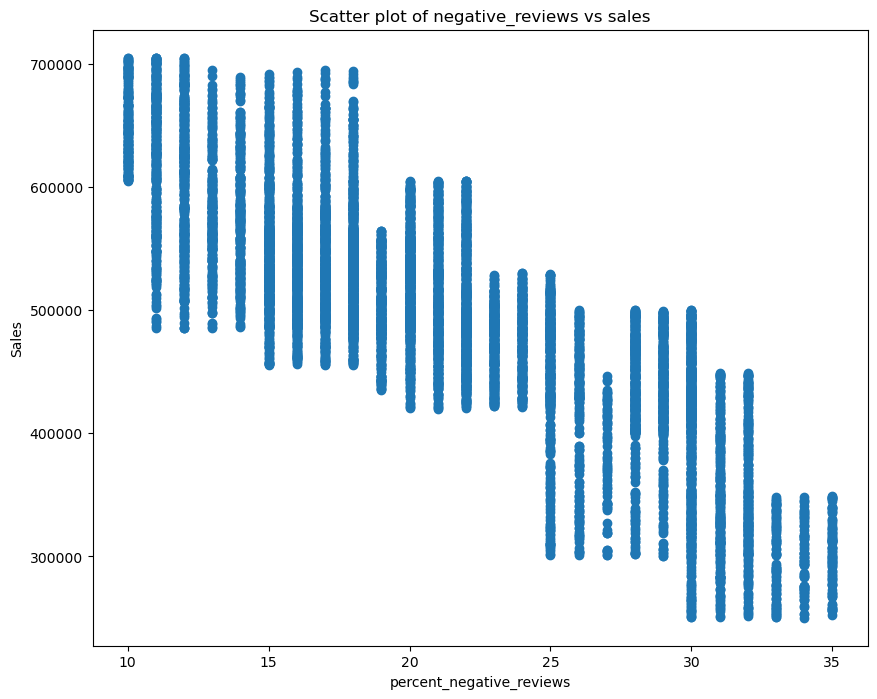

In [95]:
X2 = X['percent_negative_reviews']
plt.figure(figsize=(10,8))
plt.scatter(X2, Y)
plt.title('Scatter plot of negative_reviews vs sales')
plt.xlabel("percent_negative_reviews")
plt.ylabel("Sales")
plt.show()

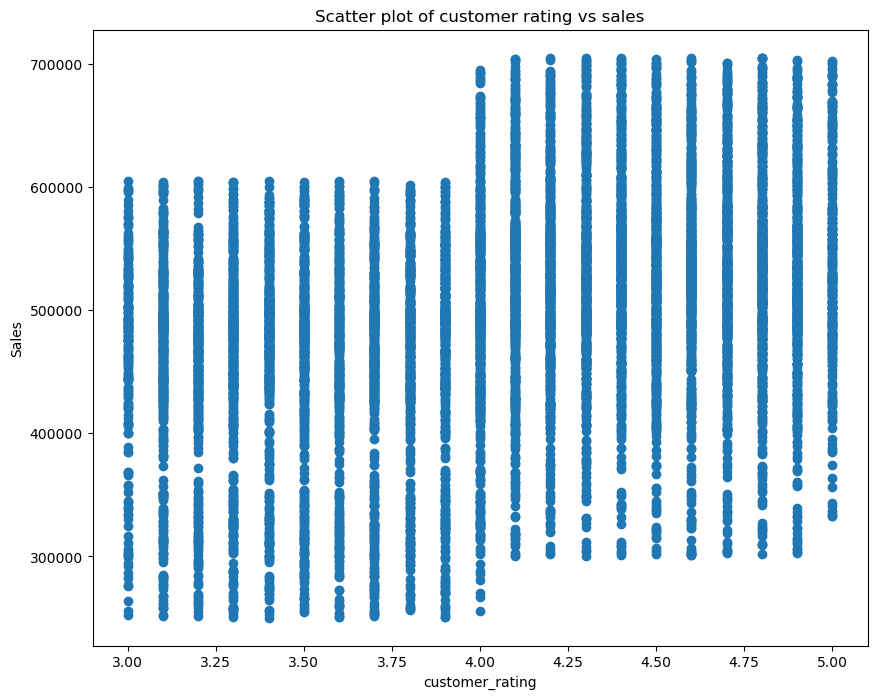

In [96]:
X3 = X['customer_rating']
plt.figure(figsize=(10,8))
plt.scatter(X3, Y)
plt.title('Scatter plot of customer rating vs sales')
plt.xlabel("customer_rating")
plt.ylabel("Sales")
plt.show()

## Step 4: Split the data into training and test

We will split the available data into training and test datasets. We will use 70% of the data for training and use 30% of the data for test

In [97]:
#Split the data into training and test
df_training, df_test = train_test_split(salesData, train_size=0.7, test_size=0.3)
print('Length of training data:',len(df_training))
print('Length of test data:',len(df_test))

Length of training data: 6650
Length of test data: 2850


## Step 5: Univariate Linear Regression

We will perform Univariate Linear Regression on the price of the product and create a linear regression model. We will find the intercept and coefficients

In [98]:
#Define X and Y for the univariate regression
price_training = df_training['price']
sales_training = df_training['total_sales']

#perform regression to estimate parameters
lr = LinearRegression().fit(price_training.values.reshape(-1,1), sales_training.values.reshape(-1,1))
reg = ["intercept", "price"]
coef = pd.DataFrame([lr.intercept_,lr.coef_[0]], reg, columns= ['coefficients'])
print(coef)

            coefficients
intercept  278097.894713
price         425.149759


Calculate the R-squared and Mean Squared Error for the linear regression model based on the training data. The R-squared will tell us how accurate our model is. The closer this value is nearer to 1, the more accurate our model is.

In [99]:
#Calculate R-squared and MSE
y_pred = lr.predict(price_training.values.reshape(-1,1))
rSquare_training_uni = r2_score(sales_training.values.reshape(-1,1), y_pred)
mse_error_training_uni = mean_squared_error(sales_training,y_pred)
print("R-squared (Training Data): ", rSquare_training_uni)
print("Mean Squared Error (Training Data): ", np.sqrt(mse_error_training_uni))

R-squared (Training Data):  0.6482332992450608
Mean Squared Error (Training Data):  53828.728971656026


Our R-squared (training data) denotes that our linear regression model is 64% accurate. 

We will now plot the linear curve on the datapoints.

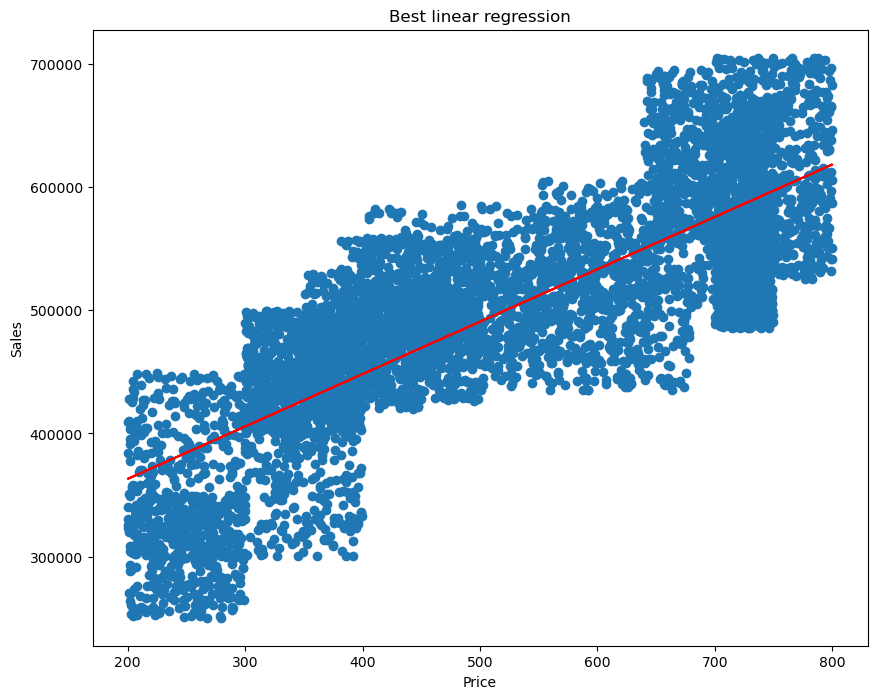

In [109]:
#Display fitted line on top of scatter plots
plt.figure(figsize=(10,8))
plt.scatter(price_training, sales_training)
plt.plot(price_training, y_pred, 'r')
plt.title('Best linear regression')
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

We will now run our model on test data and predict the outputs. And we will calculate the R-squared (Test Data) for our model.

In [101]:
#Compute mean squared error and the R-squared of the univariate linear model using the test data
price_test = df_test['price']
sales_test = df_test['total_sales']

y_pred_hat = lr.predict(price_test.values.reshape(-1,1))

rSquare_test_uni = r2_score(sales_test.values.reshape(-1,1), y_pred_hat)
mse_error_test_uni = mean_squared_error(sales_test,y_pred_hat)
print("R-squared (Test Data): ", rSquare_test_uni)
print("Mean Squared Error (Test Data): ", np.sqrt(mse_error_test_uni))

R-squared (Test Data):  0.6407095271331311
Mean Squared Error (Test Data):  53848.034854150996


Our R-squared signifies that the output for our test data is 65% accurate.

## Step 6: Multivariate Linear Regression

We will now create a multivariate Linear Regression model where our features will be 'price', 'percent_negative_reviews' and 'customer_rating'

In [102]:
#Extract the data into dataframes for training
sales_training = df_training['total_sales']
predictors_training = df_training[['price', 'percent_negative_reviews', 'customer_rating']]

#perform regression to estimate parameters
lr_mul = LinearRegression().fit(predictors_training, sales_training.values.reshape(-1,1))
reg2 = ["intercept", 'price', 'percent_negative_reviews', 'customer_rating']
coef2 = pd.DataFrame(np.transpose(np.hstack(([lr_mul.intercept_],lr_mul.coef_))),index= reg2 , columns= ['coefficients'])
print(coef2)

                           coefficients
intercept                 453858.435307
price                        230.092453
percent_negative_reviews   -6168.279125
customer_rating            13571.705690


In [103]:
#Calculate R-squared and MSE
y_pred_training_mul = lr_mul.predict(predictors_training)
rSquare_training_mul = r2_score(sales_training, y_pred_training_mul)
mse_error_training_mul = mean_squared_error(sales_training,y_pred_training_mul)
print("R-squared (Multi-variate Training Data): ", rSquare_training_mul)
print("Mean Squared Error (Multi-variate Training Data): ", np.sqrt(mse_error_training_mul))

R-squared (Multi-variate Training Data):  0.7435656666031726
Mean Squared Error (Multi-variate Training Data):  45959.45267956114


In [104]:
#Extract the data into dataframes for test
sales_test = df_test['total_sales']
predictors_test = df_test[['price', 'percent_negative_reviews', 'customer_rating']]

#Calculate R-squared and MSE
y_pred_test_mul = lr_mul.predict(predictors_test)
rSquare_test_mul = r2_score(sales_test, y_pred_test_mul)
mse_error_test_mul = mean_squared_error(sales_test,y_pred_test_mul)
print("R-squared (Multi-variate Test Data): ", rSquare_test_mul)
print("Mean Squared Error (Multi-variate Test Data): ", np.sqrt(mse_error_test_mul))

R-squared (Multi-variate Test Data):  0.7404879041051521
Mean Squared Error (Multi-variate Test Data):  45764.19321962809


Now we will compare the uni-variate and milti-variate models

In [105]:
print("Univariate R2 :", rSquare_test_uni)
print("Multivariate R2 :", rSquare_test_mul)
print('Improvement', round((rSquare_test_mul - rSquare_test_uni)/rSquare_test_uni,2))

print("Univariate MSE :", mse_error_test_uni)
print("Multivariate MSE :", mse_error_test_mul)
print('Improvement', round((np.sqrt(mse_error_test_mul) - np.sqrt(mse_error_test_uni))/np.sqrt(mse_error_test_uni),2))

Univariate R2 : 0.6407095271331311
Multivariate R2 : 0.7404879041051521
Improvement 0.16
Univariate MSE : 2899610857.6538606
Multivariate MSE : 2094361381.043454
Improvement -0.15


## Step 7: Polynomial Regression of degree 2

Now we will try to create a polynomial regression model of degree 2 and analyse if we can get a more accurate model.

In [106]:
#Polynomial regression of degree 2
poly_features2 = PolynomialFeatures(degree=2)
pr_degree2 = poly_features.fit_transform(predictors_training)

model_deg2 = LinearRegression()
model_deg2.fit(pr_degree2, sales_training)

#Calculate R-squared and MSE
y_pr2_training = model_deg2.predict(pr_degree2)
rSquare_pr2_training = r2_score(sales_training, y_pr_training)
mse_error_pr2_training = mean_squared_error(sales_training,y_pr2_training)
print("R-squared (Polynomial Training Data): ", rSquare_pr2_training)
print("Mean Squared Error (Polynomial Training Data): ", np.sqrt(mse_error_pr2_training))

R-squared (Polynomial Training Data):  -0.770871637334263
Mean Squared Error (Polynomial Training Data):  41874.17867084716


## Step 8: Polynomial Regression of degree 3

Next we will try to create another model of degree 3 for comparision.

In [107]:
#Polynomial regression of degree 3
poly_features3 = PolynomialFeatures(degree=3)
pr_degree3 = poly_features3.fit_transform(predictors_training)

model_deg3 = LinearRegression()
model_deg3.fit(pr_degree3, sales_training)

#Calculate R-squared and MSE
y_pr3_training = model_deg3.predict(pr_degree3)
rSquare_pr3_training = r2_score(sales_training, y_pr3_training)
mse_error_pr3_training = mean_squared_error(sales_training,y_pr3_training)
print("R-squared (Polynomial Training Data): ", rSquare_pr3_training)
print("Mean Squared Error (Polynomial Training Data): ", np.sqrt(mse_error_pr3_training))

R-squared (Polynomial Training Data):  0.7871277361968019
Mean Squared Error (Polynomial Training Data):  41874.17867084716


Here we can see that the accuracy of the model increases with the degree of the polynomial.

## Step 9: Predict sales based on user inputs

Next we will try to use this degree 3 model to predict the sales based on some user inputs.

In [108]:
input_data = [[300.0, 20, 4.5]]
transformed_input = poly_features3.transform(input_data)
predicted_sales = model_deg3.predict(transformed_input)
print(predicted_sales)

[450424.76033453]


C:\Users\USER\anaconda3_2023\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
